In [100]:
import os
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [101]:
fp = os.path.join(os.getcwd(),'Question2.xlsx')
fp

'd:\\Data\\OfficeWorkspace-20191016T044923Z-001\\OfficeWorkspace\\python_challenges\\nexera\\Problems\\Problems\\Question2.xlsx'

In [102]:
df = pd.read_excel(fp)\
    .fillna(0)

In [103]:
df=df[['Material', 'Shape', 'Color', 'Radius', 'Height',
       'Units (Imperial/Metric)', 'Pressure P1', 'Pressure P2',
       'Piston movement']]
df = df.replace('Up',1)
df = df.replace('Down',-1)
df

,Material,Shape,Color,Radius,Height,Units (Imperial/Metric),Pressure P1,Pressure P2,Piston movement
0,STAINLESS STEEL,CONE,orange,0.027432,0.024384,I,95959,102836,1
1,ALUMINUM,SPHERE,blue,0.090000,0.000000,M,100849,105818,-1
2,POLYSTYRENE,CUBE,black,0.000000,0.003048,I,93328,106262,1
3,PAPER,CONE,red,0.040000,0.030000,M,92008,96850,1
4,POLYSTYRENE,CUBE,orange,0.000000,0.060000,M,100407,106656,1
...,...,...,...,...,...,...,...,...,...
95,STAINLESS STEEL,CYLINDER,orange,0.050000,0.100000,M,106221,104604,-1
96,ALUMINUM,CONE,white,0.080000,0.080000,M,107102,100344,-1
97,OAK,CYLINDER,orange,0.040000,0.020000,M,102819,107796,1
98,ALUMINUM,CONE,blue,0.060000,0.020000,M,104587,103270,-1


In [108]:
df2 = df2.sort_values(by='Radius')
df2
fig = px.line(x=df2['Radius'],y=df2['Piston movement'])
fig.show()

Radius           Radius             1.000000
                 Height             0.061160
                 Pressure P1       -0.090382
                 Pressure P2        0.041975
                 Piston movement   -0.326952
Height           Radius             0.061160
                 Height             1.000000
                 Pressure P1        0.076427
                 Pressure P2        0.056051
                 Piston movement   -0.217908
Pressure P1      Radius            -0.090382
                 Height             0.076427
                 Pressure P1        1.000000
                 Pressure P2        0.170224
                 Piston movement   -0.405633
Pressure P2      Radius             0.041975
                 Height             0.056051
                 Pressure P1        0.170224
                 Pressure P2        1.000000
                 Piston movement    0.317644
Piston movement  Radius            -0.326952
                 Height            -0.217908
          

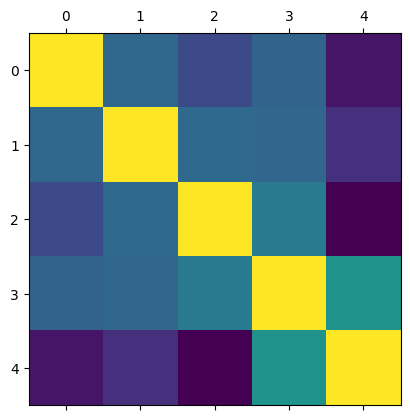

In [109]:


df3=df[[ 'Radius', 'Height','Pressure P1', 'Pressure P2',
       'Piston movement']]
corr = plt.matshow(df3.corr())

corr_pairs = df3.corr().unstack()
print(corr_pairs)

In [110]:
materials = ['STAINLESS STEEL', 'ALUMINUM', 'POLYSTYRENE', 'PAPER', 'OAK']
shapes = ['CONE', 'SPHERE', 'CUBE', 'CYLINDER']
colours = ['orange', 'blue', 'black', 'red', 'white', 'yellow']
df0 = df.copy()

In [111]:
def ismatch(x,str_):
    return 1 if x==str_ else 0

In [112]:
# df0['SS'] = df['Material'].apply(ismatch,args={'STAINLESS STEEL'})
# df0['ALUMINUM'] = df['Material'].apply(ismatch,args={'ALUMINUM'})
# df0['POLYSTYRENE'] = df['Material'].apply(ismatch,args={'POLYSTYRENE'})
# df0['PAPER'] = df['Material'].apply(ismatch,args={'PAPER'})
# df0['OAK'] = df['Material'].apply(ismatch,args={'OAK'})
# df0['CONE'] = df['Shape'].apply(ismatch,args={'CONE'})
# df0['SPHERE'] = df['Shape'].apply(ismatch,args={'SPHERE'})
# df0['CUBE'] = df['Shape'].apply(ismatch,args={'CUBE'})
# df0['CYLINDER'] = df['Shape'].apply(ismatch,args={'CYLINDER'})
# df0['IMP'] = df['Units (Imperial/Metric)'].apply(ismatch,args={'I'})
# df0['MET'] = df['Units (Imperial/Metric)'].apply(ismatch,args={'M'})



df0['IMP'] = df['Units (Imperial/Metric)'].apply(ismatch,args={'I'})
df0['MET'] = df['Units (Imperial/Metric)'].apply(ismatch,args={'M'})
for s in materials:
    s = s.upper()
    df0[s] = df0['Material'].apply(ismatch,args={s})



for s in shapes:
    s = s.upper()
    df0[s] = df0['Shape'].apply(ismatch,args={s})

for col in colours:
    # col = col
    df0[col] = df0['Color'].apply(ismatch,args={col})




In [113]:
df0.columns

Index(['Material', 'Shape', 'Color', 'Radius', 'Height',
       'Units (Imperial/Metric)', 'Pressure P1', 'Pressure P2',
       'Piston movement', 'IMP', 'MET', 'STAINLESS STEEL', 'ALUMINUM',
       'POLYSTYRENE', 'PAPER', 'OAK', 'CONE', 'SPHERE', 'CUBE', 'CYLINDER',
       'orange', 'blue', 'black', 'red', 'white', 'yellow'],
      dtype='object')

In [114]:
df00 = df0[['Radius', 'Height','Pressure P1', 'Pressure P2',
       'Piston movement','ALUMINUM', 'POLYSTYRENE', 'PAPER', 'OAK',
       'CONE', 'SPHERE', 'CUBE', 'CYLINDER', 'IMP', 'MET', 'orange', 'blue',
       'black', 'red', 'white', 'yellow', 'STAINLESS STEEL']]
df0

,Material,Shape,Color,Radius,Height,Units (Imperial/Metric),Pressure P1,Pressure P2,Piston movement,IMP,...,CONE,SPHERE,CUBE,CYLINDER,orange,blue,black,red,white,yellow
0,STAINLESS STEEL,CONE,orange,0.027432,0.024384,I,95959,102836,1,1,...,1,0,0,0,1,0,0,0,0,0
1,ALUMINUM,SPHERE,blue,0.090000,0.000000,M,100849,105818,-1,0,...,0,1,0,0,0,1,0,0,0,0
2,POLYSTYRENE,CUBE,black,0.000000,0.003048,I,93328,106262,1,1,...,0,0,1,0,0,0,1,0,0,0
3,PAPER,CONE,red,0.040000,0.030000,M,92008,96850,1,0,...,1,0,0,0,0,0,0,1,0,0
4,POLYSTYRENE,CUBE,orange,0.000000,0.060000,M,100407,106656,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,STAINLESS STEEL,CYLINDER,orange,0.050000,0.100000,M,106221,104604,-1,0,...,0,0,0,1,1,0,0,0,0,0
96,ALUMINUM,CONE,white,0.080000,0.080000,M,107102,100344,-1,0,...,1,0,0,0,0,0,0,0,1,0
97,OAK,CYLINDER,orange,0.040000,0.020000,M,102819,107796,1,0,...,0,0,0,1,1,0,0,0,0,0
98,ALUMINUM,CONE,blue,0.060000,0.020000,M,104587,103270,-1,0,...,1,0,0,0,0,1,0,0,0,0


Radius           Radius             1.000000
                 Height             0.061160
                 Pressure P1       -0.090382
                 Pressure P2        0.041975
                 Piston movement   -0.326952
                                      ...   
STAINLESS STEEL  black              0.034080
                 red               -0.152783
                 white             -0.166667
                 yellow            -0.005809
                 STAINLESS STEEL    1.000000
Length: 484, dtype: float64


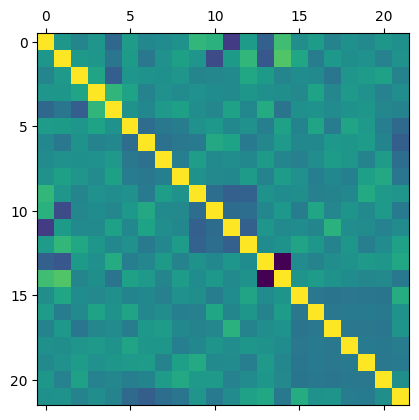

In [120]:
corr = plt.matshow(df00.corr())
corr_pairs = df00.corr().unstack()

In [119]:
corr_pairs

Radius           Radius             1.000000
                 Height             0.061160
                 Pressure P1       -0.090382
                 Pressure P2        0.041975
                 Piston movement   -0.326952
                                      ...   
STAINLESS STEEL  black              0.034080
                 red               -0.152783
                 white             -0.166667
                 yellow            -0.005809
                 STAINLESS STEEL    1.000000
Length: 484, dtype: float64

In [121]:
corr_pairs['pairs']=corr_pairs.index

In [124]:
dfc = pd.DataFrame(corr_pairs)

In [125]:
dfc

0
Radius          Radius                                                         1.0
                Height                                                     0.06116
                Pressure P1                                              -0.090382
                Pressure P2                                               0.041975
                Piston movement                                          -0.326952
...                                                                            ...
STAINLESS STEEL red                                                      -0.152783
                white                                                    -0.166667
                yellow                                                   -0.005809
                STAINLESS STEEL                                                1.0
pairs                            MultiIndex([(         'Radius',          'Radi...

[485 rows x 1 columns]

In [126]:
corr_pairs['Piston movement']

Radius            -0.326952
Height            -0.217908
Pressure P1       -0.405633
Pressure P2        0.317644
Piston movement         1.0
ALUMINUM           0.023637
POLYSTYRENE       -0.066722
PAPER              0.081747
OAK                0.136939
CONE               -0.01802
SPHERE            -0.073103
CUBE               0.143428
CYLINDER          -0.066722
IMP                0.230859
MET               -0.230859
orange             0.006063
blue               0.021194
black             -0.032642
red                0.021194
white              0.061338
yellow            -0.073103
STAINLESS STEEL   -0.108521
dtype: object

In [136]:
Counter(df[df.Color=='red'].Shape.tolist())

Counter({'CONE': 3, 'CUBE': 4, 'SPHERE': 3, 'CYLINDER': 5})

In [139]:

df[df.Shape=='CUBE']

,Material,Shape,Color,Radius,Height,Units (Imperial/Metric),Pressure P1,Pressure P2,Piston movement
2,POLYSTYRENE,CUBE,black,0.0,0.003048,I,93328,106262,1
4,POLYSTYRENE,CUBE,orange,0.0,0.060000,M,100407,106656,1
5,POLYSTYRENE,CUBE,red,0.0,0.009144,I,105055,96833,-1
9,POLYSTYRENE,CUBE,blue,0.0,0.040000,M,106568,98844,-1
10,STAINLESS STEEL,CUBE,orange,0.0,0.050000,M,95343,98121,-1
12,PAPER,CUBE,yellow,0.0,0.006096,I,103594,103441,-1
17,STAINLESS STEEL,CUBE,black,0.0,0.003048,I,93161,99214,1
24,POLYSTYRENE,CUBE,white,0.0,0.020000,M,109373,93090,-1
25,OAK,CUBE,black,0.0,0.100000,M,100160,99668,-1
27,ALUMINUM,CUBE,red,0.0,0.070000,M,94231,98119,-1


In [140]:
df[df.Shape=='CUBE'].describe()

,Radius,Height,Pressure P1,Pressure P2,Piston movement
count,29.0,29.000000,29.000000,29.000000,29.000000
mean,0.0,0.043767,101454.827586,101566.586207,-0.172414
std,0.0,0.031350,5548.759862,5240.614574,1.002460
min,0.0,0.003048,92122.000000,93090.000000,-1.000000
25%,0.0,0.018288,96679.000000,98121.000000,-1.000000
50%,0.0,0.040000,101129.000000,101749.000000,-1.000000
75%,0.0,0.070000,105593.000000,106110.000000,1.000000
max,0.0,0.100000,111367.000000,111869.000000,1.000000


In [145]:
df.groupby('Shape').apply(sum)

,Material,Shape,Color,Radius,Height,Units (Imperial/Metric),Pressure P1,Pressure P2,Piston movement
Shape,,,,,,,,,
CONE,STAINLESS STEELPAPERPOLYSTYRENEALUMINUMPAPERST...,CONECONECONECONECONECONECONECONECONECONECONECO...,orangeredwhitewhiteyellowredwhiteyelloworangeb...,1.367160,1.119728,IMIMMMIMMMMIIIIMMMMMMMMMMMM,2726090,2754101,-11
CUBE,POLYSTYRENEPOLYSTYRENEPOLYSTYRENEPOLYSTYRENEST...,CUBECUBECUBECUBECUBECUBECUBECUBECUBECUBECUBECU...,blackorangeredblueorangeyellowblackwhiteblackr...,0.000000,1.269248,IMIMMIIMMMMIMMMMMIIMMMMMMIMMM,2942190,2945431,-5
CYLINDER,PAPERALUMINUMSTAINLESS STEELSTAINLESS STEELOAK...,CYLINDERCYLINDERCYLINDERCYLINDERCYLINDERCYLIND...,yellowwhiteblueyellowyellowblueorangeblackwhit...,1.052296,1.535824,MIMIMMIMMMMMMMMMMMMIIMMIMMM,2799962,2765016,-13
SPHERE,ALUMINUMALUMINUMPOLYSTYRENEALUMINUMALUMINUMPOL...,SPHERESPHERESPHERESPHERESPHERESPHERESPHERESPHE...,bluewhiteorangebluebluewhiteredyellowredbluebl...,0.896576,0.000000,MMMIMMMIIMMMMMMMM,1715458,1726510,-9
